<p style="background-color:#95856a;font-family:newtimeroman;color:#D8CA7E;font-size:300%;text-align:center;border-radius:40px 40px;">LIBRARIES</p>

In [1]:
!pip install -qqq optuna

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
import xgboost as xgb
import optuna

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,auc,roc_curve

In [3]:
df = pd.read_csv("/Users/canis/Library/CloudStorage/OneDrive-Persönlich/Dokumente/programme/coding/github/telco-customer-churn/2_data/Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<!-- <a id="3.2"></a> -->
<p style="background-color:#95856a;font-family:newtimeroman;color:#D8CA7E;font-size:300%;text-align:center;border-radius:40px 40px;">Data PreProcessing</p>

In [4]:
df.drop("customerID", axis=1 ,inplace =True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') # coerce => If the data null will put NAN instead of rease error

In [8]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<p style="background-color:#95856a;font-family:newtimeroman;color:#D8CA7E;font-size:300%;text-align:center;border-radius:40px 40px;">Feature Engineering</p>

<h3>Tenure Group</h3>

In [9]:
def tenure_group(tenure):
    if tenure <= 12:
        return '0-1 year'
    elif tenure <= 24:
        return '1-2 years'
    elif tenure <= 48:
        return '2-4 years'
    elif tenure <= 60:
        return '4-5 years'
    else:
        return '5+ years'
    
df['TenureGroup'] = df['tenure'].apply(tenure_group)

<h3>TotalCharges per Tenure</h3>

In [10]:
df['ChargesPerMonth'] = df['TotalCharges'] / df['tenure']

<h3>Contract and PaymentMethod</h3>

In [11]:
df['Contract_PaymentInteraction'] = df['Contract'] + '_' + df['PaymentMethod']

<h3>Has Phone And Internet</h3>

In [12]:
df['HasPhoneAndInternet'] = np.where((df['PhoneService'] == 'Yes') & (df['InternetService'] != 'No'), 1, 0)

<h3>Number of services</h3>

In [13]:
df['NumServices'] = ((df[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                         'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                         'StreamingMovies']] == 'Yes') |
                          (df['InternetService'].isin(['DSL', 'Fiber optic']))).sum(axis=1)

In [14]:
df.isnull().sum()

gender                          0
SeniorCitizen                   0
Partner                         0
Dependents                      0
tenure                          0
PhoneService                    0
MultipleLines                   0
InternetService                 0
OnlineSecurity                  0
OnlineBackup                    0
DeviceProtection                0
TechSupport                     0
StreamingTV                     0
StreamingMovies                 0
Contract                        0
PaperlessBilling                0
PaymentMethod                   0
MonthlyCharges                  0
TotalCharges                   11
Churn                           0
TenureGroup                     0
ChargesPerMonth                11
Contract_PaymentInteraction     0
HasPhoneAndInternet             0
NumServices                     0
dtype: int64

In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,ChargesPerMonth,Contract_PaymentInteraction,HasPhoneAndInternet,NumServices
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,No,0-1 year,29.850000,Month-to-month_Electronic check,0,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,No,2-4 years,55.573529,One year_Mailed check,1,3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,0-1 year,54.075000,Month-to-month_Mailed check,1,3
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,No,2-4 years,40.905556,One year_Bank transfer (automatic),0,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,Yes,0-1 year,75.825000,Month-to-month_Electronic check,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Mailed check,84.80,1990.50,No,1-2 years,82.937500,One year_Mailed check,1,7
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Credit card (automatic),103.20,7362.90,No,5+ years,102.262500,One year_Credit card (automatic),1,6
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,Yes,Electronic check,29.60,346.45,No,0-1 year,31.495455,Month-to-month_Electronic check,0,1
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,Yes,Mailed check,74.40,306.60,Yes,0-1 year,76.650000,Month-to-month_Mailed check,1,2


In [16]:
null_columns = df.isna().sum()
null_columns = null_columns[null_columns > 0] # Catch row which has null values
print(null_columns)

TotalCharges       11
ChargesPerMonth    11
dtype: int64


In [17]:
list_of_non_numerical = df.select_dtypes(exclude=['int64', 'float64']).columns # Catch categecores coulumns
print("Non-numerical columns in training set:", list(list_of_non_numerical))

Non-numerical columns in training set: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'TenureGroup', 'Contract_PaymentInteraction']


<h3>label encoder</h3>

In [18]:
label_encoder = LabelEncoder()
for col in list_of_non_numerical:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

<p style="background-color:#95856a;font-family:newtimeroman;color:#D8CA7E;font-size:300%;text-align:center;border-radius:40px 40px;">Filling Missing Values Using Euclidean Distance</p>

In [19]:
def fill_missing_values(data_f, null_column):
    cols = list(data_f.columns.difference([null_column])) # all compelete coulmns names
    non_missing_df = data_f.dropna(subset=[null_column]) # df without nulls
    missing_df = data_f[data_f[null_column].isna()] # df which has null

    # If no missing will continue 
    if missing_df.empty or non_missing_df.empty:
        return

    distance = euclidean_distances(non_missing_df[cols].fillna(0), missing_df[cols].fillna(0)) # get simmiler rows
    nearest_index = np.argmin(distance, axis=0)
    
    data_f.loc[data_f[null_column].isna(), null_column] = non_missing_df.iloc[nearest_index][null_column].values # Filling the null values

In [20]:
for col in list(null_columns.index):
    fill_missing_values(df, col)

In [21]:
print("Remaining missing values in training set:\n", df.isna().sum())

Remaining missing values in training set:
 gender                         0
SeniorCitizen                  0
Partner                        0
Dependents                     0
tenure                         0
PhoneService                   0
MultipleLines                  0
InternetService                0
OnlineSecurity                 0
OnlineBackup                   0
DeviceProtection               0
TechSupport                    0
StreamingTV                    0
StreamingMovies                0
Contract                       0
PaperlessBilling               0
PaymentMethod                  0
MonthlyCharges                 0
TotalCharges                   0
Churn                          0
TenureGroup                    0
ChargesPerMonth                0
Contract_PaymentInteraction    0
HasPhoneAndInternet            0
NumServices                    0
dtype: int64


<p style="background-color:#95856a;font-family:newtimeroman;color:#D8CA7E;font-size:300%;text-align:center;border-radius:40px 40px;">VISUALIZATION</p>

In [22]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,ChargesPerMonth,Contract_PaymentInteraction,HasPhoneAndInternet,NumServices
0,0,0,1,0,1,0,1,0,0,2,...,1,2,29.85,29.85,0,0,29.850000,2,0,1
1,1,0,0,0,34,1,0,0,2,0,...,0,3,56.95,1889.50,0,2,55.573529,7,1,3
2,1,0,0,0,2,1,0,0,2,2,...,1,3,53.85,108.15,1,0,54.075000,3,1,3
3,1,0,0,0,45,0,1,0,2,0,...,0,0,42.30,1840.75,0,2,40.905556,4,0,3
4,0,0,0,0,2,1,0,1,0,0,...,1,2,70.70,151.65,1,0,75.825000,2,1,1


In [23]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

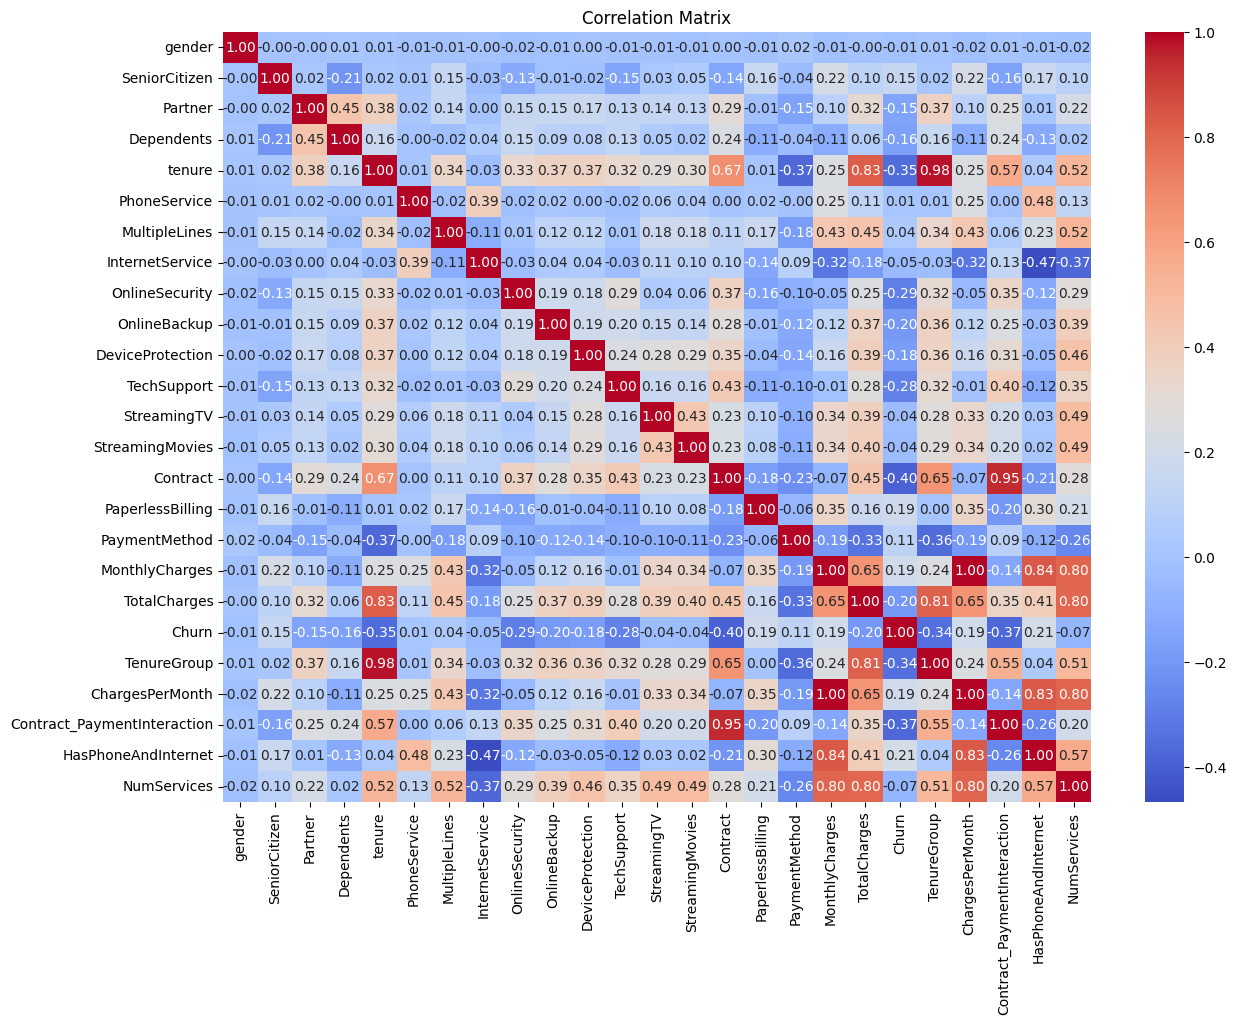

In [24]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [25]:
print(df['Churn'].unique())

[0 1]


<h3>Notice Imbalance data!!!!</h3>

In [26]:
df.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64


<h3>Now, we need to figure out the relationship between the Features and the Target and see what will make a good fit with our model, we will be using the Likelihood Ratio Method that measures the corelation between our Target and other Features.</h3>

<p style="background-color:#95856a;font-family:newtimeroman;color:#D8CA7E;font-size:300%;text-align:center;border-radius:40px 40px;">Likelihood Ratio</p>

<h3>RULE:</h3>

```
Likelihood_Ratio = (Global_Rate / Group_Rate) × 100
```

In [27]:
global_mean = np.round(df['Churn'].mean(), 2)

In [28]:
import plotly.graph_objs as go

In [29]:
exclude_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

render_limit = 16  # Limit the number of figures becaues it crash in colab and kaggle
counter = 0

for feature in df.columns:
    if feature in exclude_columns or feature == 'Churn':
        continue

    df_group = df.groupby(by=feature)['Churn'].mean().reset_index()

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=df_group[feature],
        y=df_group['Churn'],
        marker=dict(
            color=df_group['Churn'],
            colorscale='Viridis',
            colorbar=dict(title='Churn Rate')
        ),
        text=df_group['Churn'].round(2),
        textposition='auto',
    ))

    fig.add_shape(
        type='line',
        x0=df_group[feature].min(), x1=df_group[feature].max(),
        y0=global_mean, y1=global_mean,
        line=dict(color='red', width=3, dash='dot')
    )

    fig.add_annotation(
        x=df_group[feature].min() + (df_group[feature].max() - df_group[feature].min()) * 0.05,
        y=global_mean + 0.05,
        text=f'Global Mean: {global_mean}',
        showarrow=True,
        arrowhead=2,
        font=dict(color='red', size=14, family='Arial'),
        bgcolor='rgba(255, 255, 255, 0.7)'
    )

    fig.update_layout(
        title=f'Churn Rate by {feature}',
        xaxis_title=feature,
        yaxis_title='Churn Rate',
        xaxis=dict(tickvals=df_group[feature], ticktext=df_group[feature].astype(int)),
        template='plotly_dark',
        title_font=dict(size=20, family='Arial', color='white'),
        xaxis_title_font=dict(size=14, family='Arial', color='white'),
        yaxis_title_font=dict(size=14, family='Arial', color='white')
    )

    if counter < render_limit:
        fig.show()
        counter += 1
    else:
        break

In [30]:
num_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

correlations = {}
for col in num_columns:
    correlation = df[col].corr(df['Churn'])
    correlations[col] = correlation

correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])

fig = go.Figure()

fig.add_trace(go.Bar(
    x=correlation_df['Feature'],
    y=correlation_df['Correlation'],
    marker_color=['#FF6347', '#4682B4', '#32CD32'],
    text=correlation_df['Correlation'].round(2),
    textposition='auto'
))

fig.add_shape(
    type='line',
    x0=-0.5, x1=len(exclude_columns)-0.5,
    y0=0, y1=0,
    line=dict(color='rgba(128, 128, 128, 0.6)', width=2, dash='dash')
)

fig.update_layout(
    title='Correlation with Numerical Features with Churn',
    xaxis_title='Feature',
    yaxis_title='Correlation Coefficient',
    template='plotly_white',
    xaxis=dict(tickmode='linear')
)

fig.show()

In [31]:
df.drop(['gender'], axis=1, inplace=True) # Gender form Visiualizations and corr => Not effect in the decision coulmn

<p style="background-color:#95856a;font-family:newtimeroman;color:#D8CA7E;font-size:300%;text-align:center;border-radius:40px 40px;">Evaluation & Modeling</p>

In [32]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,ChargesPerMonth,Contract_PaymentInteraction,HasPhoneAndInternet,NumServices
0,0,1,0,1,0,1,0,0,2,0,...,1,2,29.85,29.85,0,0,29.850000,2,0,1
1,0,0,0,34,1,0,0,2,0,2,...,0,3,56.95,1889.50,0,2,55.573529,7,1,3
2,0,0,0,2,1,0,0,2,2,0,...,1,3,53.85,108.15,1,0,54.075000,3,1,3
3,0,0,0,45,0,1,0,2,0,2,...,0,0,42.30,1840.75,0,2,40.905556,4,0,3
4,0,0,0,2,1,0,1,0,0,0,...,1,2,70.70,151.65,1,0,75.825000,2,1,1


In [33]:
X = df.drop('Churn', axis=1)
y = df['Churn']

<p style="background-color:#95856a;font-family:newtimeroman;color:#D8CA7E;font-size:300%;text-align:center;border-radius:40px 40px;">Handling Inbalance dataset</p>

In [34]:
from imblearn.under_sampling import TomekLinks

In [35]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

tomek_links = TomekLinks()
X_resampled, y_resampled = tomek_links.fit_resample(X_smote, y_smote)

df_smote = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Churn'])], axis=1)

In [36]:
df_smote.shape

(9981, 24)

In [37]:
X = df_smote.drop(['Churn'], axis=1)
y = df_smote['Churn']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
X = scaler.fit_transform(X)

<p style="background-color:#95856a;font-family:newtimeroman;color:#D8CA7E;font-size:200%;text-align:center;border-radius:40px 40px;">Random Forest Classifier</p>

<h3>optuna</h3>

In [41]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        random_state=42
    )
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print(study.best_params)

[I 2024-10-10 18:25:42,902] A new study created in memory with name: no-name-427247ac-b949-40f6-9d8e-dc441d0663dd
[I 2024-10-10 18:25:50,310] Trial 0 finished with value: 0.8478410204576944 and parameters: {'n_estimators': 377, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 7, 'bootstrap': False}. Best is trial 0 with value: 0.8478410204576944.
[I 2024-10-10 18:25:52,814] Trial 1 finished with value: 0.8449781516288224 and parameters: {'n_estimators': 183, 'max_depth': 12, 'min_samples_split': 14, 'min_samples_leaf': 2, 'bootstrap': True}. Best is trial 0 with value: 0.8478410204576944.
[I 2024-10-10 18:26:01,698] Trial 2 finished with value: 0.8509899099132312 and parameters: {'n_estimators': 426, 'max_depth': 25, 'min_samples_split': 10, 'min_samples_leaf': 5, 'bootstrap': False}. Best is trial 2 with value: 0.8509899099132312.
[I 2024-10-10 18:26:10,847] Trial 3 finished with value: 0.8465524427472317 and parameters: {'n_estimators': 476, 'max_depth': 26, 'min_samples_

{'n_estimators': 287, 'max_depth': 43, 'min_samples_split': 5, 'min_samples_leaf': 1, 'bootstrap': False}


<h3>GridSearchCV</h3>

In [42]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

forest_model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=forest_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred_forest = best_model.predict(X_test)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total ti

In [43]:
print(best_params)
print(best_model) 
print(accuracy_score(y_test, y_pred_forest))

{'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=200)
0.8534223706176962


<h3>Random Forest</h3>

<h3>optuna</h3>

```{'n_estimators': 250, 'max_depth': 26, 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': False}```

In [44]:
forest_model = RandomForestClassifier(class_weight='balanced', bootstrap= False, max_depth= 26, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 250)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
y_prob_forest = forest_model.predict_proba(X_test)[:, 1]

fpr_forest, tpr_forest, _ = roc_curve(y_test, y_prob_forest)
roc_auc_forest = auc(fpr_forest, tpr_forest)

print("Random Forest MODEL")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_forest))

Random Forest MODEL
Accuracy: 0.859432387312187
ROC-AUC: 0.9335431921542269


<h3>GridSearchCV</h3>

```{'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False}```

In [45]:
forest_model = RandomForestClassifier(class_weight='balanced', bootstrap= False, max_depth= 20, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
y_prob_forest = forest_model.predict_proba(X_test)[:, 1]

fpr_forest, tpr_forest, _ = roc_curve(y_test, y_prob_forest)
roc_auc_forest = auc(fpr_forest, tpr_forest)

print("Random Forest MODEL")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_forest))

Random Forest MODEL
Accuracy: 0.859432387312187
ROC-AUC: 0.9344269768173563


<h4>Evaluation</h4>

classification report
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1568
           1       0.85      0.86      0.85      1427

    accuracy                           0.86      2995
   macro avg       0.86      0.86      0.86      2995
weighted avg       0.86      0.86      0.86      2995



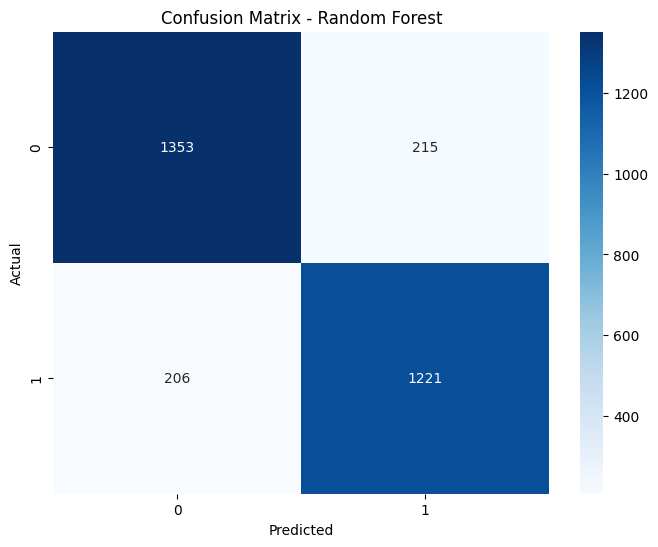

In [46]:
print("classification report")
print(classification_report(y_test, y_pred_forest))
cm = confusion_matrix(y_test, y_pred_forest)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.show()

<h3>Evaluation With Kfolds</h3>

In [47]:
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(forest_model, X_train, y_train, cv=skf, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [0.84334764 0.84824624 0.85182534 0.87258411 0.86256263]
Mean CV Accuracy: 0.8557131928934167


In [48]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fpr_forest, y=tpr_forest,
    mode='lines',
    line=dict(color='purple', width=2),
    name=f'ROC Curve (AUC = {roc_auc_forest:.2f})'
))
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    line=dict(color='gray', width=2, dash='dash'),
    name='Random'
))
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve - Random Forest',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_dark'
)
fig.show()

<h3>XGBoost</h3>

In [49]:
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)

print("XGBOOST MODEL")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 1.0}
XGBOOST MODEL
Accuracy: 0.8547579298831386
ROC-AUC: 0.9361330946183657


<h4>Evaluation</h4>

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1568
           1       0.84      0.86      0.85      1427

    accuracy                           0.85      2995
   macro avg       0.85      0.85      0.85      2995
weighted avg       0.86      0.85      0.85      2995



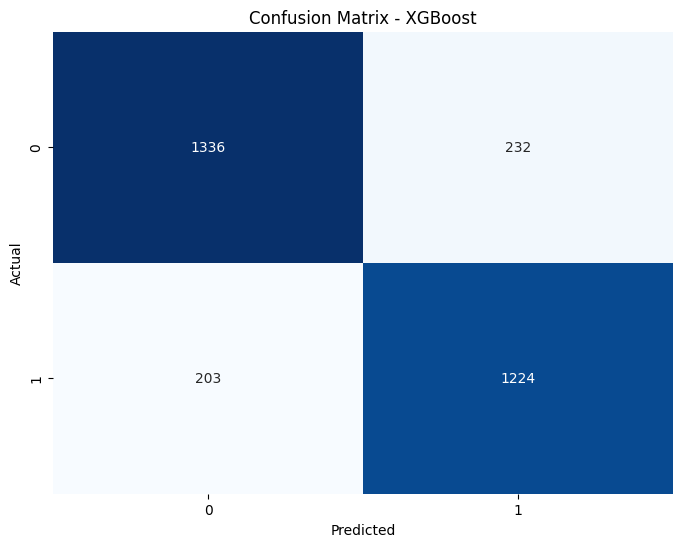

In [50]:
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - XGBoost')
plt.show()

In [51]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fpr, y=tpr,
    mode='lines',
    line=dict(color='red', width=2),
    name='ROC Curve'
))
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    line=dict(color='White', width=2, dash='dash'),
    name='Random'
))
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_dark'
)
fig.show()

<h3>Logistic Regression Model</h3>

In [52]:
log_model = LogisticRegression(solver="liblinear" , random_state=1)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

print("Logistic Regression MODEL")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))

Logistic Regression MODEL
Accuracy: 0.8290484140233723
ROC-AUC: 0.9186513647154727


<h4>Evaluation</h4>

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1568
           1       0.81      0.84      0.82      1427

    accuracy                           0.83      2995
   macro avg       0.83      0.83      0.83      2995
weighted avg       0.83      0.83      0.83      2995



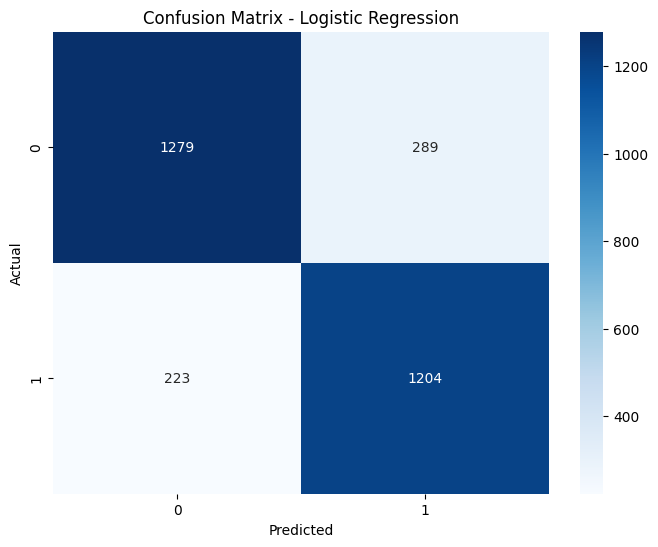

In [53]:
print("Classification Report")
print(classification_report(y_test, y_pred_log))
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [54]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fpr_log, y=tpr_log,
    mode='lines',
    line=dict(color='orange', width=2),
    name=f'ROC Curve (AUC = {roc_auc_log:.2f})'
))
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    line=dict(color='White', width=2, dash='dash'),
    name='Random'
))
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_dark'
)
fig.show()

<h3>Decision Tree Model</h3>

In [55]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

print("Decision Tree MODEL")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_tree))

Decision Tree MODEL
Accuracy: 0.8080133555926544
ROC-AUC: 0.809052234243382


<h4>Evaluation</h4>

classification report
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1568
           1       0.80      0.80      0.80      1427

    accuracy                           0.81      2995
   macro avg       0.81      0.81      0.81      2995
weighted avg       0.81      0.81      0.81      2995



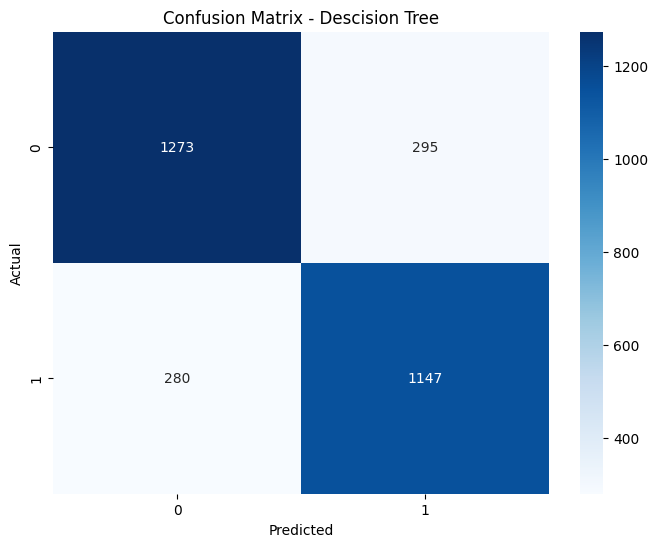

In [56]:
print("classification report")
print(classification_report(y_test, y_pred_tree))
cm = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Descision Tree')
plt.show()

In [57]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fpr_tree, y=tpr_tree,
    mode='lines',
    line=dict(color='green', width=2),
    name=f'ROC Curve (AUC = {roc_auc_tree:.2f})'
))
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    line=dict(color='White', width=2, dash='dash'),
    name='Random'
))
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_dark'
)
fig.show()

<p style="background-color:#95856a;font-family:newtimeroman;color:#D8CA7E;font-size:300%;text-align:center;border-radius:40px 40px;">Comparison Between Models Accuracy and ROC Score</p>

In [58]:
models = ['XGBoost', 'Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_tree),
    accuracy_score(y_test, y_pred_forest)
]
fig_acc = go.Figure()
fig_acc.add_trace(go.Bar(
    x=models,
    y=accuracies,
    marker_color='royalblue',
    text=[f'{acc:.2f}' for acc in accuracies],
    textposition='auto'
))
fig_acc.update_layout(
    title='Model Accuracy Comparison',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    template='plotly_dark'
)
fig_acc.show()

In [59]:
roc_auc_scores = [
    roc_auc_score(y_test, y_prob_xgb),
    roc_auc_score(y_test, y_prob_log),
    roc_auc_score(y_test, y_prob_tree),
    roc_auc_score(y_test, y_prob_forest)
]
fig_auc = go.Figure()
fig_auc.add_trace(go.Bar(
    x=models,
    y=roc_auc_scores,
    marker_color='darkorange',
    text=[f'{auc:.2f}' for auc in roc_auc_scores],
    textposition='auto'
))
fig_auc.update_layout(
    title='Model ROC-AUC Comparison',
    xaxis_title='Model',
    yaxis_title='ROC-AUC Score',
    template='plotly_dark'
)
fig_auc.show()

<p style="background-color:#95856a;font-family:newtimeroman;color:#D8CA7E;font-size:300%;text-align:center;border-radius:40px 40px;">Test the 'choosed Model' On All Dataset Using best Model</p>

<h3>Random Forest Evaluation</h3>

Random Forest Model
Accuracy: 0.951307484220018
ROC-AUC: 0.9514776559985442

classification_report
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      5174
           1       0.94      0.96      0.95      4807

    accuracy                           0.95      9981
   macro avg       0.95      0.95      0.95      9981
weighted avg       0.95      0.95      0.95      9981



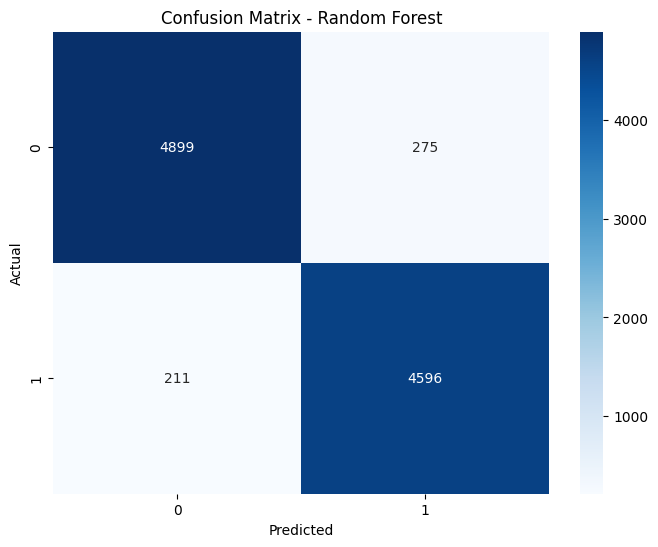

In [60]:
y_pred_forest = forest_model.predict(X)

print("Random Forest Model")
print("Accuracy:", accuracy_score(y, y_pred_forest))
print("ROC-AUC:", roc_auc_score(y, y_pred_forest))

print("\n""classification_report")
print(classification_report(y, y_pred_forest))
cm = confusion_matrix(y, y_pred_forest)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.show()

<p style="background-color:#95856a;font-family:newtimeroman;color:#D8CA7E;font-size:300%;text-align:center;border-radius:40px 40px;">Unspervised Learning</p>

In [61]:
X = df.drop('Churn', axis=1)

In [62]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [63]:
X.shape

(7043, 23)

<p style="background-color:#95856a;font-family:newtimeroman;color:#D8CA7E;font-size:300%;text-align:center;border-radius:40px 40px;">kmeans</p>

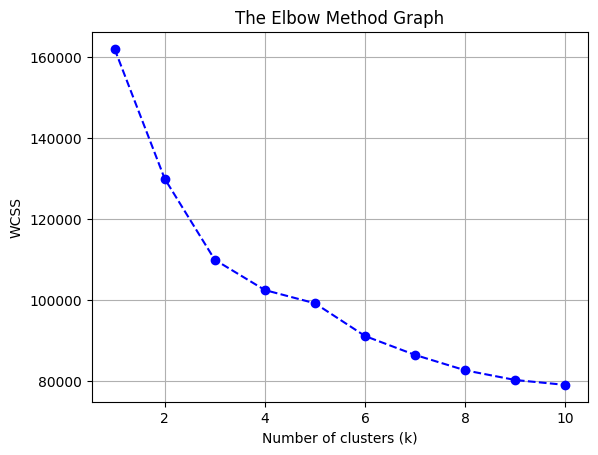

In [64]:
wcss_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_list, marker='o', linestyle='--', color='b')
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

<p style="background-color:#95856a;font-family:newtimeroman;color:#D8CA7E;font-size:300%;text-align:center;border-radius:40px 40px;">Silhouette Score</p>

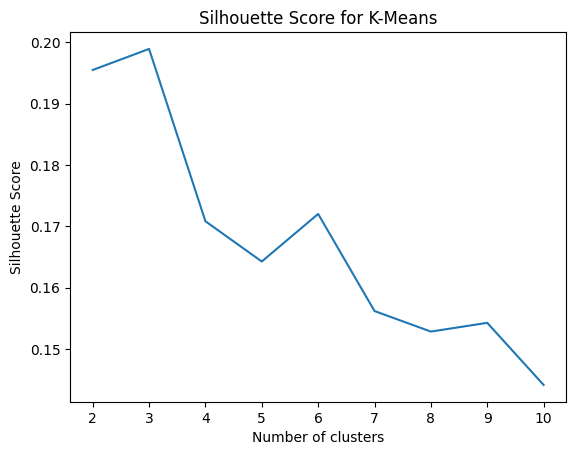

In [65]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score for K-Means')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

<p style="background-color:#95856a;font-family:newtimeroman;color:#D8CA7E;font-size:300%;text-align:center;border-radius:40px 40px;">Use '4' Clusters</p>

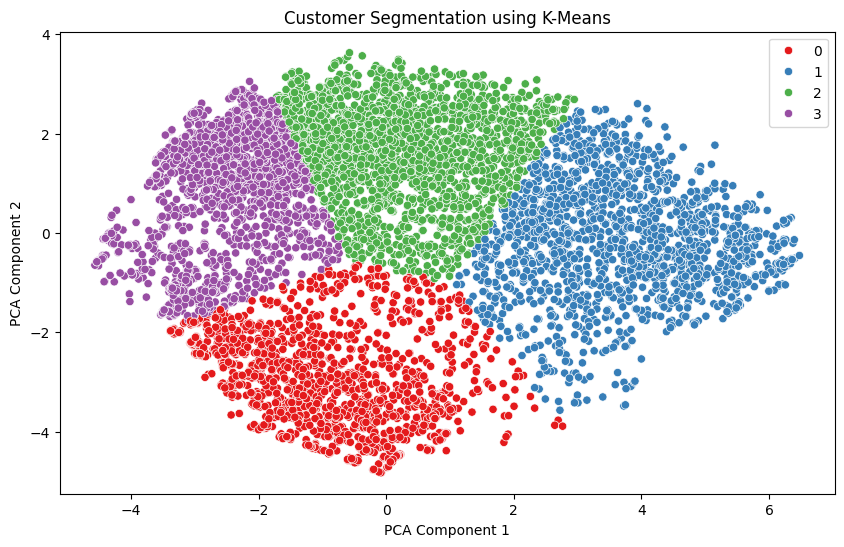

In [66]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set1')
plt.title('Customer Segmentation using K-Means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [67]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

df['Cluster'] = clusters

fig = px.scatter(
    df,
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    color='Cluster',
    color_discrete_sequence=px.colors.qualitative.Set1,
    labels={'x': 'PCA Component 1', 'y': 'PCA Component 2', 'Cluster': 'Cluster'},
    title='Customer Segmentation using K-Means'
)
fig.update_layout(
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2',
    template='plotly_white'
)
fig.show()

In [68]:
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,ChargesPerMonth,Contract_PaymentInteraction,HasPhoneAndInternet,NumServices,Cluster
0,0,1,0,1,0,1,0,0,2,0,...,2,29.85,29.85,0,0,29.850000,2,0,1,3
1,0,0,0,34,1,0,0,2,0,2,...,3,56.95,1889.50,0,2,55.573529,7,1,3,3
2,0,0,0,2,1,0,0,2,2,0,...,3,53.85,108.15,1,0,54.075000,3,1,3,3
3,0,0,0,45,0,1,0,2,0,2,...,0,42.30,1840.75,0,2,40.905556,4,0,3,0
4,0,0,0,2,1,0,1,0,0,0,...,2,70.70,151.65,1,0,75.825000,2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,2,0,2,0,2,...,3,84.80,1990.50,0,1,82.937500,7,1,7,1
7039,0,1,1,72,1,2,1,0,2,2,...,1,103.20,7362.90,0,4,102.262500,5,1,6,1
7040,0,1,1,11,0,1,0,2,0,0,...,2,29.60,346.45,0,0,31.495455,2,0,1,3
7041,1,1,0,4,1,2,1,0,0,0,...,3,74.40,306.60,1,0,76.650000,3,1,2,3


<p style="background-color:#95856a;font-family:newtimeroman;color:#D8CA7E;font-size:300%;text-align:center;border-radius:40px 40px;">Hierarchical Clustering</p>

In [69]:
linked = linkage(X, method='ward')

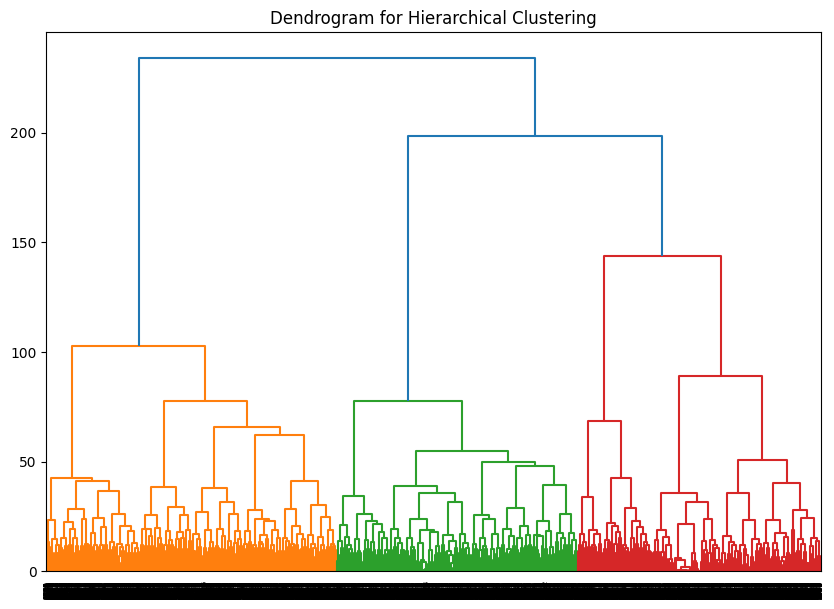

In [70]:
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()